<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn06_MVOptimization_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotting functions in 3D
Although there are many different ways to do this, the one that is the easiest that comes with base R is to use a contour plot. In order to use the contour plot, we will need to find function values for all combinations of x and y. R uses the ```outer``` command, but that will make us have to rewrite our functions (instead of vector, outer wants to variables x and y). We call our function ```Outer``` and you can put it in your ma391 package. ```Outer``` will take a list of x and y values along with the function that will be evaluated and will return a matrix of evaluations (z-values). We will then use these z-values to plot the function over our range using the contour command.

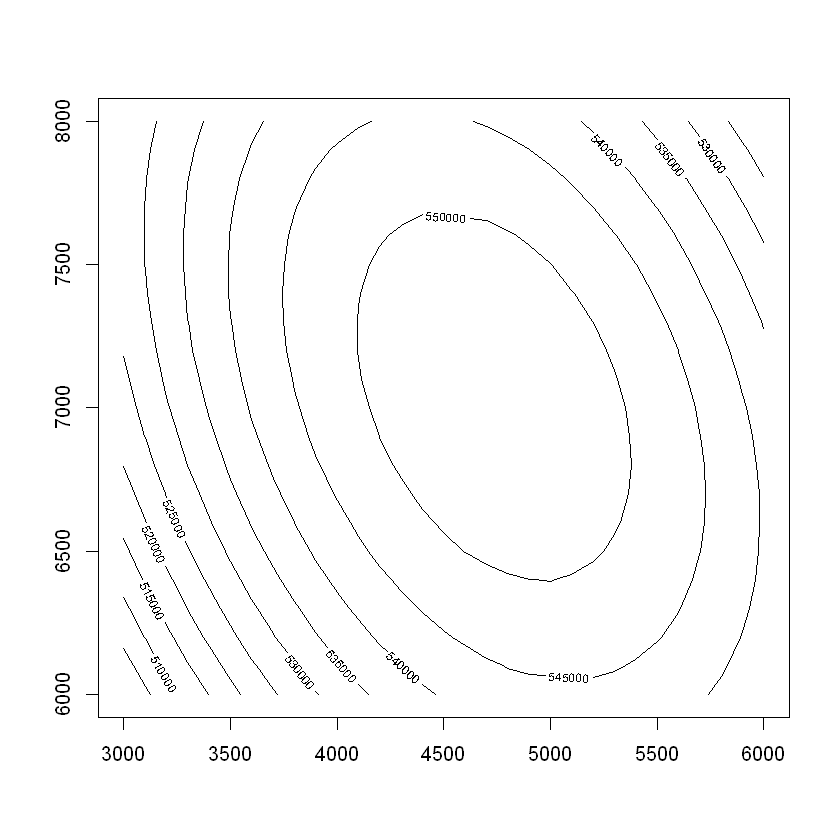

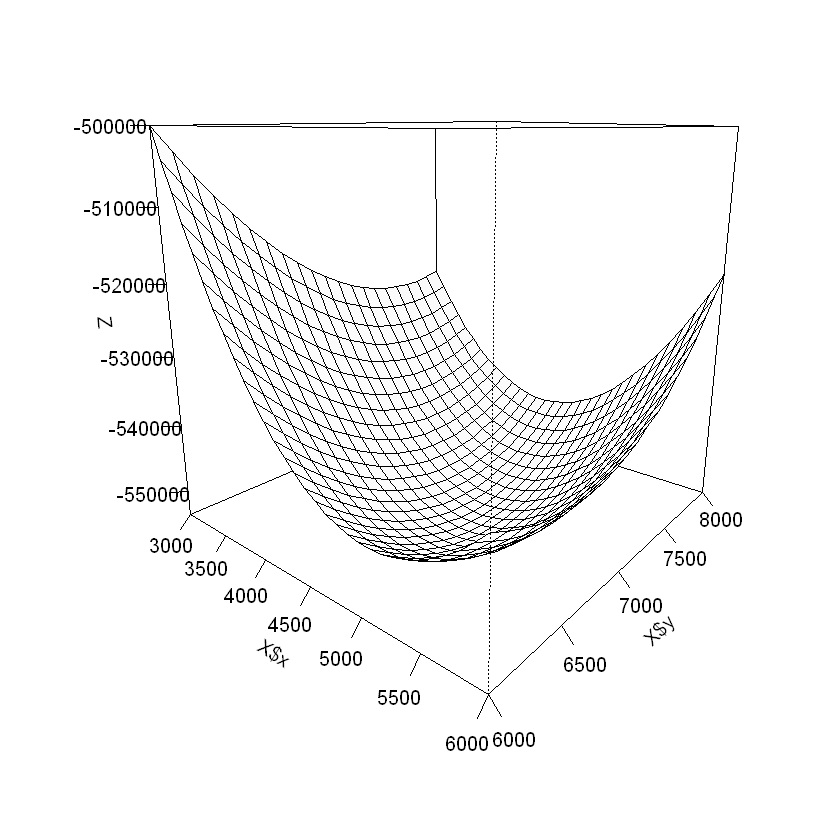

In [0]:
Outer = function(f,x){
  n1 = length(x[[1]])
  n2 = length(x[[2]])
  res = matrix(0,nrow=n1,ncol=n2)
  rownames(res) = x[[1]]
  colnames(res) = x[[2]]
  for (i in 1:n1){
    for (j in 1:n2){
      res[i,j]=f(c(x[[1]][[i]],x[[2]][[j]]))
    }
  }
  return(res)
}

P = function(x){
    return(((339-0.01*x[1]-0.003*x[2])*x[1]
           +(399-0.004*x[1]-0.01*x[2])*x[2]
           -(400000+195*x[1]+225*x[2]))*-1)
}
X = list(x=seq(3000,6000,100),y=seq(6000,8000,100))
Z = Outer(P,X)
contour(x=X$x,y=X$y,z=-Z)
persp(x=X$x,y=X$y,Z,theta=40,ticktype = "detailed",shade=0.01)

#### Need Better graphics ?
The surface plot (persp) definitely leaves something to be desired and if you want to use better graphics, ggplot and plotly are two packages that can give you much better results. Let's look at ggplot and see what the graphs look using it.

In [0]:
Product = function(f,X){
  #X is a list with two vector of numbers, f is a function that returns the optimal f
  #output is a table of x,y,f(x,y) values and a matrix of x,y,f(x,y) values
  col1=0
  col2=0
  l = length(X[[1]])*length(X[[2]])
  fun=data.frame(x=1:l,y=1:l,f=1:l)
  n = 0
  z = matrix(0,nrow=length(X[[1]]),ncol=length(X[[2]]))
  for (i in 1:length(X[[1]])){
    for (j in 1:length(X[[2]])){
      n=n+1
      fVal = f(c(X[[1]][i],X[[2]][j]))
      fun$x[n]=X[[1]][i]
      fun$y[n]=X[[2]][j]
      fun$f[n]=fVal
      z[i,j]=fVal #matrix of z values for all (x row, y col)
    }
  }
#df is a table of x*y rows of function values, fun is a matrix of x rows and y cols
ans = list(df=fun,z=z)
return(ans)
}
Z=Product(P,X)

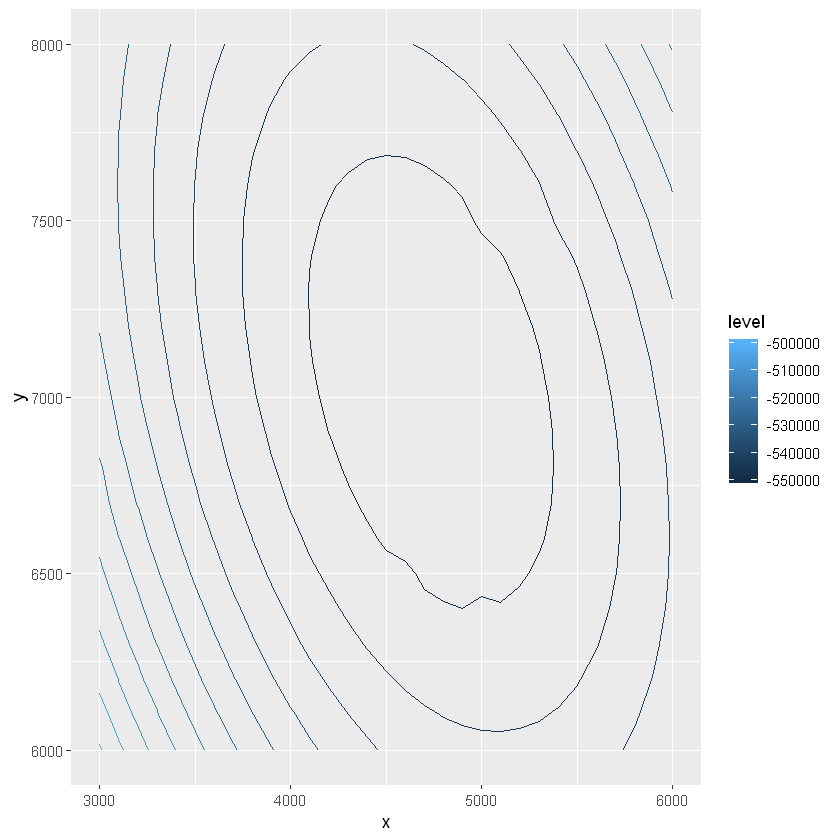

In [0]:
library(ggplot2)
library(RColorBrewer)
df = Z$df
v = ggplot(df, aes(x, y, z = f))
v=v + geom_contour(aes(colour = stat(level)))
v

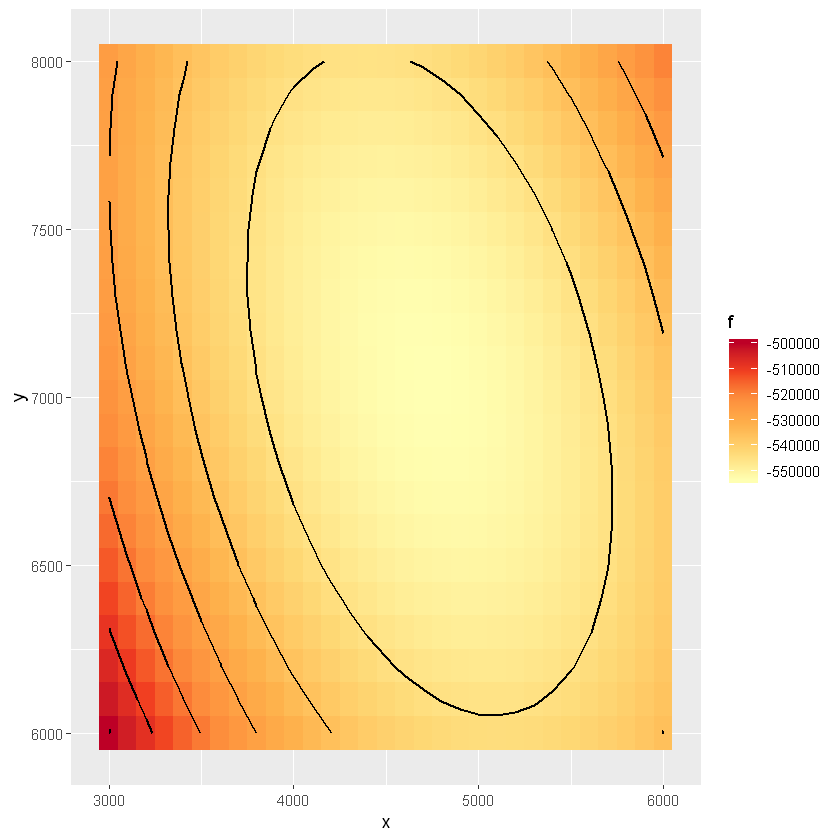

In [0]:
v=ggplot(df, aes(x, y, z = f))+
    geom_tile(aes(fill=f))+
    stat_contour(bins=6,aes(x,y,z=f), color="black", size=0.6)+
    scale_fill_gradientn(colours=brewer.pal(6,"YlOrRd"))
v

## Numerical Optimization - Newton's Method ##
We will use Newton's Method to minimize the function $P(x)$ from above that we used optim() to solve. Fortunately, we do not need to take many steps for this function because it is basically quadratic which allows Newton's method to converge very quickly to the solution. Note how small the gradient is in step 2&3 below.

In [0]:
## gradient function ##
grad = function(f,x,h=0.01){
  n = length(x)
  delF = array(0,dim=c(n,1))
  for (i in 1:n){
    xhp = xhm = x

    xhp[i]=xhp[i]+h
    xhm[i]=xhm[i]-h
    delF[i] = (f(xhp)-f(xhm))/(2*h)
  }
  return (delF)
}

## Hessian Function ##
hessian = function(f,x,hs=0.01){
  n = length(x)
  H = array(0,dim=c(n,n))

  for (i in 1:n){
    h = array(0.0,dim=c(n,1))
    h[i] = hs
    H[i,]=t((grad(f,x+h)-grad(f,x-h))/(2*hs))
    #print(H[i,])
  }
  return (H)
}

In [0]:
## Step one of the algorithm ##
x0=c(500,500)
g=grad(P,x0)
H=hessian(P,x0)
print("Hessian")
print(H)
print("Negative Gradient")
print(-g)
print("Solve H*p=-g for p")
p = solve(H,-g)
print(p)
x1 = x0+p
print("Next x is")
print(x1)

[1] "Hessian"
            [,1]        [,2]
[1,] 0.020000007 0.006999908
[2,] 0.006999908 0.020000007
[1] "Negative Gradient"
      [,1]
[1,] 130.5
[2,] 160.5
[1] "Solve H*p=-g for p"
         [,1]
[1,] 4235.069
[2,] 6542.743
[1] "Next x is"
         [,1]
[1,] 4735.069
[2,] 7042.743


In [0]:
## Step two of the algorithm ##
g=grad(P,x1)
H=hessian(P,x1)
print(H)
print(-g)
print("Solve H*p=-g for p")
p = solve(H,-g)
print(p)
x2 = x1+p
print("Next x is")
print(x2)

            [,1]        [,2]
[1,] 0.020000152 0.007000053
[2,] 0.007000053 0.019998988
             [,1]
[1,] 0.0003197929
[2,] 0.0002512243
[1] "Solve Hp=-g"
            [,1]
[1,] 0.013211362
[2,] 0.007937603
[1] "Next x is"
         [,1]
[1,] 4735.043
[2,] 7042.735


In [0]:
## Step 3 of the algorithm ##
g=grad(P,x2)
H=hessian(P,x2)
print(H)
print(-g)
print("Solve Hp=-g")
p = solve(H,-g)
print(p)
x3 = x2+p
print("Next x is")
print(x3)

            [,1]        [,2]
[1,] 0.019996660 0.007000053
[2,] 0.007000053 0.020000152
             [,1]
[1,] 0.000000e+00
[2,] 2.328306e-08
[1] "Solve Hp=-g"
              [,1]
[1,] -4.644235e-07
[2,]  1.326693e-06
[1] "Next x is"
         [,1]
[1,] 4735.043
[2,] 7042.735
